# LeNet-5
이 파일은 LeNet-5(1998)논문을 직접 구현해보는 파일이다

In [10]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# MNIST 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


1. 간단하게 Tensorflow를 사용해 비슷하게만 따라하는 방법

In [3]:
# 필요 library
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import ZeroPadding2D

In [4]:
LeNet = Sequential()
LeNet.add(ZeroPadding2D(padding=2))
LeNet.add(Conv2D(filters=6, kernel_size=5, padding='valid', strides=1, activation='tanh'))
LeNet.add(AveragePooling2D(pool_size=2, strides=2))
LeNet.add(Conv2D(filters=16, kernel_size=5, padding='valid', strides=1, activation='tanh'))
LeNet.add(AveragePooling2D(pool_size=2, strides=2))
LeNet.add(Flatten())
LeNet.add(Dense(units=120, activation='tanh'))
LeNet.add(Dense(units=84, activation='tanh'))
LeNet.add(Dense(units=10, activation='softmax'))

LeNet.build(input_shape=(None,28,28,1))
LeNet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
LeNet.compile(optimizer='adam', loss='categorical_crossentropy', )
history = LeNet.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), )

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3959 - val_loss: 0.1099
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0964 - val_loss: 0.0902
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0646 - val_loss: 0.0653
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0454 - val_loss: 0.0609
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0381 - val_loss: 0.0543
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0320 - val_loss: 0.0508
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0271 - val_loss: 0.0469
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0215 - val_loss: 0.0553
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0198 - val_loss: 0.0512
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0182 - val_loss: 0.0587
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0158 - val_loss: 0.0504
Epoch 12/20
1875/1875 ━━━━━━━━

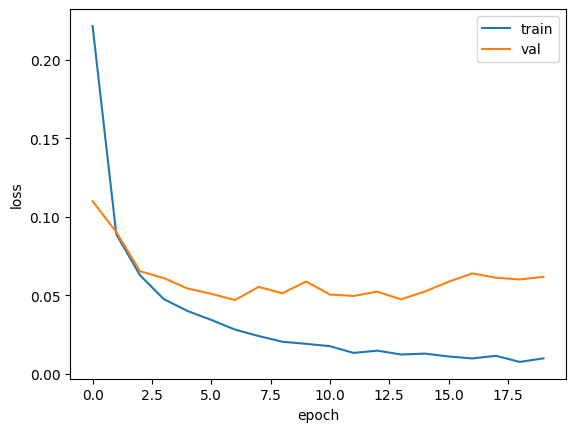

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

조금더 Low 한 관점에서의 model

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
def model(train_x, train_y, valid_x, valid_y, test_x, learning_rate=0.0001, batch_size=128, num_epoch=100):
    X = tf.placeholder(tf.float32, [None, 28, 28, 1], name='X')
    Y = tf.placeholder(tf.float32, [None, ], name='Y')

    def CNN(X):
        # Here we define the LeNet-5 architecture

        # Reshape the input to 4D tensor
        input_layer = tf.reshape(X, [-1, 28, 28, 1])

        # Padding the input to make it 32X32. Specification of LeNET
        padded_input = tf.pad(input_layer, [[0, 0], [2, 2], [2, 2], [0, 0]], "CONSTANT")